# LKIF
Created on Mon Sep  7 16:26:22 2020 


@Author: Yineng Rong @ yinengrong@foxmail.com

 (based on the original MATLAB codes by X. San Liang, which are available at www.ncoads.org)
        

@Maintainer: Yineng Rong @ yinengrong@foxmail.com


### About the module

Causal analysis, a fundamental problem in various disciplines, has recently been recognized as a promising approach to developing an explainable deep learning. However, incorporation of causality into artificial intelligence algorithms is faced with challenges such as ambiguity, non-quantifiability, and computational inefficiency in the traditional formalisms. Over the past two decades, these challenges have been essentially fixed, with the development of a rigorous and **quantitative causality analysis - the Liang-Kleeman information flow theory** (Liang and Kleeman, 2005; Liang, 2008; 2014; 2016; 2021). This theory, which is based on a rigorous footing and derived from first principles, has resulted in notable scientific discoveries in fields ranging from finance, neuroscience, quantum mechanics, artificial intelligence to oceanography, meteorology and climate science. This module provides a practical implementation of the theory, complete with core codes and selected examples. All the codes are translated from the MATLAB scripts orginally written by X.S. Liang and can be downloaded from http://www.ncoads.org/.


**Citations:**
* **X.S. Liang**, 2016: Information flow and causality as rigorous notions ab initio. Phys. Rev. E, 94, 052202.
* **X.S. Liang**, 2014: Unraveling the cause-effect relation between time series. Phys. Rev. E, 90, 052150.
* **X.S. Liang**, 2021: Normalized multivariate time series causality analysis and causal graph reconstruction. Entropy, 23, 679.


[![License](https://img.shields.io/badge/license-MIT-blue.svg)](https://github.com/YinengRong/LKIF/blob/main/LICENSE)

### Requirements
* numpy
* scipy

### Installation
pip install LK_Info_flow

In [1]:
import numpy as np
from LK_Info_Flow import causal

# case 1 (bivariate causality):

In [2]:
import numpy as np
np.random.seed(0)  #
from LK_Info_Flow import causal
import matplotlib.pyplot as plt
#case 1: for x1 and x2
a11=0.3;a12=-0.4;a22=0.7;a21=0;b1=0.5;b2=0.5;
x=np.zeros([10000,])
y=np.zeros([10000,])
x[0]=0.4;y[0]=0.3;
for i in range(10000-1):
    x[i+1]=a11*x[i]+a21*y[i]+b1*np.random.normal();
    y[i+1]=a12*x[i]+a22*y[i]+b2*np.random.normal();

print ("x(i+1)=%.2f * x(i) + %.2f * y(i) + %.2f W" % (a11, a21,b1))
print ("y(i+1)=%.2f * x(i) + %.2f * y(i) + %.2f W" % (a12, a22,b2))



X=np.ones((2,10000));
X[0]=x;X[1]=y;
causal_graph=causal.multi_causality_est_OLS(X[:,200:]);
IF=np.squeeze(causal_graph.get('IF'));
nIF=np.squeeze(causal_graph.get('nIF'));


e99=np.squeeze(causal_graph.get('err_e99'));

print('The normalized information flow:')
print(nIF)
#print(nIF[0,1])
#plt.matshow(nIF, 0,cmap='RdYlGn',vmin=-0.01,vmax=0.01)



if abs(IF[0,1])>e99[0,1]:
    print('x -> y percent:%5.2f' % (nIF[0,1]*100)+'%')
else:
    print('x not -> y')


if abs(IF[1,0])>e99[1,0]:
    print('y -> x percent:%5.2f' % (nIF[1,0]*100)+'%')
else:
    print('y not -> x')

x(i+1)=0.30 * x(i) + 0.00 * y(i) + 0.50 W
y(i+1)=-0.40 * x(i) + 0.70 * y(i) + 0.50 W
The normalized information flow:
[[-4.36209240e-01  2.33393125e-04]
 [ 3.87043871e-02 -4.12108423e-01]]
x not -> y
y -> x percent: 3.87%


# case 2 (multivariable causality):

In [3]:
#case 2: for x1 ,x2, x3, x4  =>multi 
a11=0.3;a21=0;  a31=0;  a41=0;  b1=0.4;
a12=0.5;a22=0.7;a32=0.1;a42=0;  b2=0.5;
a13=0;  a23=0.3;a33=0.5;a43=0;  b3=0.6;
a14=0.2;a24=0.4;a34=0.3;a44=0.1;  b4=0.3;
xx=np.zeros([1001,4])
xx[0]=np.array([0.4,0.5,0.6,0.7])
for i in range(1000):
    xx[i+1,0]=a11*xx[i,0]+a21*xx[i,1]+a31*xx[i,2]+a41*xx[i,3]+b1*np.random.normal();
    xx[i+1,1]=a12*xx[i,0]+a22*xx[i,1]+a32*xx[i,2]+a42*xx[i,3]+b2*np.random.normal();
    xx[i+1,2]=a13*xx[i,0]+a23*xx[i,1]+a33*xx[i,2]+a43*xx[i,3]+b3*np.random.normal();
    xx[i+1,3]=a14*xx[i,0]+a24*xx[i,1]+a34*xx[i,2]+a44*xx[i,3]+b4*np.random.normal();


print ("x1(i+1)=%.2f * x1(i) + %.2f * x2(i)+%.2f * x3(i) + %.2f * x4(i) + %.2f W" % (a11, a21, a31,a41,b1))
print ("x2(i+1)=%.2f * x1(i) + %.2f * x2(i)+%.2f * x3(i) + %.2f * x4(i) + %.2f W" % (a12, a22, a32,a42,b2))
print ("x3(i+1)=%.2f * x1(i) + %.2f * x2(i)+%.2f * x3(i) + %.2f * x4(i) + %.2f W" % (a13, a23, a33,a43,b3))
print ("x4(i+1)=%.2f * x1(i) + %.2f * x2(i)+%.2f * x3(i) + %.2f * x4(i) + %.2f W" % (a14, a24, a34,a44,b4))

Nxx=np.array(np.shape(xx));
IF=np.zeros([Nxx[1],Nxx[1]]);
#a=np.linspace(0,3,4);a=np.array(a,int)
Nxx=np.array(np.shape(xx));
# Nxx[1]=Nxx[1]+1;
t=np.linspace(0,1000,1001)
cau2=causal.multi_causality_est_OLS(X=xx.T,series_temporal_order=t)
IF = np.squeeze(cau2.get('IF'))
nIF= np.squeeze(cau2.get('nIF'));
err= np.squeeze(cau2.get('err_e99'));

for i in range(4):
    for j in range(4):
        if abs(IF[i,j])>err[i,j]:
            IF[i,j]=1;

print('xj -> xi:')
f='    j';
Nxx=np.array(np.shape(xx));
for i in range(Nxx[1]):
    f='    '+f;
print(f)
f='    %6d'%1;
for i in range(Nxx[1]-1):
    f=f+'%5d'%(i+2);
print(f)
for j in range(Nxx[1]):
    if j== np.floor(Nxx[1]/2):
        f=' i';
    else:
        f='  ';
    f=f+'%5d'%(j+1)
    for i in range(Nxx[1]):
        f=f+'  %d  ' %(IF[j,i])
    print(f)

print('Tj->i:')
f='    j';
Nxx=np.array(np.shape(xx));
for i in range(Nxx[1]):
    f='     '+f;
print(f)
f='        %7d'%1;
for i in range(Nxx[1]-1):
    f=f+'%9d'%(i+2);
print(f)
for j in range(Nxx[1]):
    if j== np.floor(Nxx[1]/2):
        f=' i';
    else:
        f='  ';
    f=f+'%5d'%(j+1)
    for i in range(Nxx[1]):
        f=f+' %8.4f ' %(nIF[j,i])
    print(f)

    
    
print('e99:')
f='    j';
Nxx=np.array(np.shape(xx));
for i in range(Nxx[1]):
    f='     '+f;
print(f)
f='        %7d'%1;
for i in range(Nxx[1]-1):
    f=f+'%9d'%(i+2);
print(f)
for j in range(Nxx[1]):
    if j== np.floor(Nxx[1]/2):
        f=' i';
    else:
        f='  ';
    f=f+'%5d'%(j+1)
    for i in range(Nxx[1]):
        f=f+' %8.4f ' %(err[j,i])
    print(f)


    
print('p-value:')
p=np.squeeze(cau2.get('p'));
f='    j';
Nxx=np.array(np.shape(xx));
for i in range(Nxx[1]):
    f='     '+f;
print(f)
f='        %7d'%1;
for i in range(Nxx[1]-1):
    f=f+'%9d'%(i+2);
print(f)
for j in range(Nxx[1]):
    if j== np.floor(Nxx[1]/2):
        f=' i';
    else:
        f='  ';
    f=f+'%5d'%(j+1)
    for i in range(Nxx[1]):
        f=f+' %8.4f ' %(p[j,i])
    print(f)

    
    


x1(i+1)=0.30 * x1(i) + 0.00 * x2(i)+0.00 * x3(i) + 0.00 * x4(i) + 0.40 W
x2(i+1)=0.50 * x1(i) + 0.70 * x2(i)+0.10 * x3(i) + 0.00 * x4(i) + 0.50 W
x3(i+1)=0.00 * x1(i) + 0.30 * x2(i)+0.50 * x3(i) + 0.00 * x4(i) + 0.60 W
x4(i+1)=0.20 * x1(i) + 0.40 * x2(i)+0.30 * x3(i) + 0.10 * x4(i) + 0.30 W
xj -> xi:
                    j
         1    2    3    4
      1  1    0    0    0  
      2  1    1    1    0  
 i    3  0    1    1    0  
      4  1    1    1    1  
Tj->i:
                        j
              1        2        3        4
      1  -0.2228   -0.0008   -0.0008   -0.0007 
      2   0.0226   -0.3044    0.0314    0.0121 
 i    3  -0.0005    0.0883   -0.3908    0.0042 
      4   0.0020    0.1360    0.0937   -0.3581 
e99:
                        j
              1        2        3        4
      1   0.0780    0.0096    0.0040    0.0040 
      2   0.0046    0.0637    0.0234    0.0462 
 i    3   0.0025    0.0310    0.0723    0.0498 
      4   0.0013    0.0324    0.0264    0.0556 
p-va

# case 3 (panel data, discontinuous time series or ensemble data):
### 3.1

In [4]:
import time
from tqdm import tqdm 
np.random.seed(None)
#case 3: for x1 ,x2, x3, x4  =>panel data

a11=0.3;a21=0;  a31=0;  a41=0;  b1=0.4;
a12=0.5;a22=0.7;a32=0.1;a42=0;  b2=0.5;
a13=0;  a23=0.3;a33=0.5;a43=0;  b3=0.6;
a14=0.2;a24=0.4;a34=0.3;a44=0.1;b4=0.3;
case_num=1000;
xx=np.zeros([case_num,1001,4])
xx[:,0,:]=np.array([0.4,0.5,0.6,0.7])
print('----------generating the data----------')
for icase in tqdm(range(case_num)):
    if icase!=0:
        xx[icase,0,:]=xx[icase,0,:]*np.random.normal(0,0,4)
    for i in range(1000):
        xx[icase,i+1,0]=a11*xx[icase,i,0]+a21*xx[icase,i,1]+a31*xx[icase,i,2]+a41*xx[icase,i,3]+b1*np.random.normal();
        xx[icase,i+1,1]=a12*xx[icase,i,0]+a22*xx[icase,i,1]+a32*xx[icase,i,2]+a42*xx[icase,i,3]+b2*np.random.normal();
        xx[icase,i+1,2]=a13*xx[icase,i,0]+a23*xx[icase,i,1]+a33*xx[icase,i,2]+a43*xx[icase,i,3]+b3*np.random.normal();
        xx[icase,i+1,3]=a14*xx[icase,i,0]+a24*xx[icase,i,1]+a34*xx[icase,i,2]+a44*xx[icase,i,3]+b4*np.random.normal();

X = np.zeros([10*case_num,4]);
t = np.zeros([10*case_num,]);
for j in range(case_num):
    i=int(np.floor(np.random.uniform()*case_num));
    X[10*j:10*(j+1),:]=xx[i,-10:,:];
    # t[10*j:10*(j+1),:]=np.tile(np.linspace(0,9,10),(4,1)).T;
    t[10*j:10*(j+1),]=np.linspace(0,9,10);
print('start calculate causality:')
time_start=time.time()
IF_panel=causal.multi_causality_est_OLS(X=X[:,:2].T,series_temporal_order=t)#LIF(xx1=X[:,0],xx2=X[:,1],t=t)

T21=IF_panel.get('IF').squeeze()
err=IF_panel.get('err_e99').squeeze()
time_end=time.time()
print('est_panel: T1->2: %8.4f e90: %8.4f'%(T21[1,0], err[1,0]))
print('est_panel: T2->1: %8.4f e99: %8.4f'%(T21[0,1], err[0,1]))
print('time cost: %8.4f s'%(time_end-time_start))

time_start=time.time()
IF_time_series=causal.multi_causality_est_OLS(X=xx[1,:,:].T)
T21=IF_time_series.get('IF').squeeze()
err=IF_time_series.get('err_e99').squeeze()
time_end=time.time()
print('est_time_series: T1->2: %8.4f e90: %8.4f'%(T21[1,0], err[1,0]))
print('est_time_series: T2->1: %8.4f e99: %8.4f'%(T21[0,1], err[0,1]))
print('time cost: %8.4f s'%(time_end-time_start))



----------generating the data----------


  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:08<00:00, 119.82it/s]

start calculate causality:
est_panel: T1->2:   0.0238 e90:   0.0015
est_panel: T2->1:  -0.0006 e99:   0.0023
time cost:   0.0056 s
est_time_series: T1->2:   0.0312 e90:   0.0055
est_time_series: T2->1:  -0.0006 e99:   0.0128
time cost:   0.0010 s


## 3.2 
For time series data with missing measurements in time or a set of ensemble data, we need to provide an additional time corresponding to each data point (set the parameter "series_temporal_order")

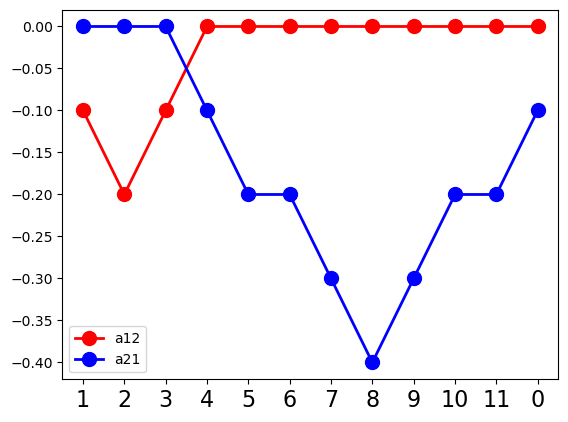

100%|██████████| 100/100 [00:08<00:00, 11.97it/s]

Ground truth is: X2->X1
IF(panel)
[[-0.59 -0.05 -0.01]
 [ 0.   -1.9  -0.  ]
 [ 0.01  0.   -0.61]]
IF(temperal)
[[-0.76 -0.04 -0.02]
 [ 0.03 -1.63 -0.02]
 [ 0.01 -0.   -0.81]]
normalized IF(panel)
[[-0.45 -0.04 -0.01]
 [ 0.   -0.93 -0.  ]
 [ 0.01  0.   -0.48]]
normalized IF(temperal)
[[-0.23 -0.01 -0.01]
 [ 0.01 -0.74 -0.01]
 [ 0.   -0.   -0.25]]
p-value(panel)
[[1.   1.   0.59]
 [0.62 1.   0.61]
 [0.6  0.61 1.  ]]
p-value(temperal)
[[1.   1.   0.53]
 [0.97 1.   0.93]
 [0.49 0.47 1.  ]]
effect size(panel)
[[0.5  0.33 0.03]
 [0.03 6.24 0.03]
 [0.03 0.04 0.52]]
effect size(temperal)
[[0.43 0.13 0.02]
 [0.07 1.94 0.06]
 [0.02 0.02 0.47]]
structure Hanming Distance(panel)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
structure Hanming Distance(time_series)
[[ 0.  9.  0.]
 [15.  0.  3.]
 [ 0.  0.  0.]]


In [5]:

# -*- coding: utf-8 -*-
"""
Created on Wed Sep 13 08:37:30 2023

@author: Yinen
"""

import numpy as np
from LK_Info_Flow import causal
import scipy.io as sio 
from tqdm import tqdm
NT = 12000


# delay cyclic causal structure
AT = np.zeros((3, 3, 12))
for i in range(3):
    AT[i,i,:]=0.4
AT[1, 1, :] = -0.9
AT[0, 1, 0] = -0.1
AT[0, 1, 1] = -0.2
AT[0, 1, 2] = -0.1

AT[1, 0, 3] = -0.1
AT[1, 0, 4] = -0.2
AT[1, 0, 5] = -0.2

AT[1, 0, 6] = -0.3
AT[1, 0, 7] = -0.4
AT[1, 0, 8] = -0.3

AT[1, 0, 9] = -0.2
AT[1, 0, 10] = -0.2
AT[1, 0, 11] = -0.1

#plot the cyclic element A12 and A21
import matplotlib.pyplot as plt
x1=np.squeeze(AT[0,1,:])
x2=np.squeeze(AT[1,0,:])
plt.plot(x1, marker='o', markeredgecolor='r', markersize=10, linewidth=2, color='r')
plt.plot(x2, marker='o', markeredgecolor='b', markersize=10, linewidth=2, color='b')
plt.legend(['a12', 'a21'])
plt.xticks(range(0,12), [str(i) for i in range(1,12)] + ['0'], fontsize=16)
plt.xlim([-0.5, 11.5])
plt.show()


### repeat the experiment 100 time
B = np.eye(3) * 0.3 + np.ones((3, 3)) * 0.3
X = np.zeros((3, NT+1200))
NIF=[];P=[];SEIF=[];IFs=[];
NIF1=[];P1=[];SEIF1=[];IFs1=[];
for in_ in tqdm(range(1, 101)):

##Exclude the first 1200 time steps and select the stable time seires for information flow calculation.
    vt = 1200
    for it in range(1, NT+vt):
        X[:, it] = np.dot(AT[:, :, (it+2) % 12].T, X[:, it-1]) + np.dot(B, np.random.randn(3, 1)).T

    nn = X.shape
    N = X[:, 1201::12].shape
    
    xx = np.zeros((3, N[1]*2))
    t = np.zeros((1, N[1]*2))

# select Feb and Mar
    for i in range(3):
        xx[i, :] = np.reshape(np.array([X[i, 1200::12], X[i, 1201::12]]).T, (1, N[1]*2))
    t = np.reshape(np.array([np.arange(1200,nn[1],12), np.arange(1201,nn[1],12)]).T, (1, N[1]*2))

## information flow for panel data    
    IF=causal.multi_causality_est_OLS(X=xx,series_temporal_order=t)
    NIF.append(IF['nIF'])
    P.append(IF['p'])
    SEIF.append(IF['SEIF'])
    IFs.append(IF['IF'])
## information flow for temperal data        
    IF=causal.multi_causality_est_OLS(X=xx)
    NIF1.append(IF['nIF'])
    P1.append(IF['p'])
    SEIF1.append(IF['SEIF'])
    IFs1.append(IF['IF'])

# list-> numpy.array
NIF=np.array(NIF);NIF1=np.array(NIF1);
IFs=np.array(IFs);IFs1=np.array(IFs1);
P=np.array(P);P1=np.array(P1);
SEIF=np.array(SEIF);SEIF1=np.array(SEIF1);

print('Ground truth is: X2->X1')
## outputs
#average IF
print('IF(panel)')
mean_IF=np.squeeze(np.average(IFs,axis=0))
print(np.around(mean_IF,2))
print('IF(temperal)')
mean_IF1=np.squeeze(np.average(IFs1,axis=0))
print(np.around(mean_IF1,2))

#average nIF
print('normalized IF(panel)')
mean_NIF=np.squeeze(np.average(NIF,axis=0))
print(np.around(mean_NIF,2))
print('normalized IF(temperal)')
mean_NIF1=np.squeeze(np.average(NIF1,axis=0))
print(np.around(mean_NIF1,2))

#average p-value
print('p-value(panel)')
mean_P=np.squeeze(np.average(P,axis=0))
print(np.around(mean_P,2))
print('p-value(temperal)')
mean_P1=np.squeeze(np.average(P1,axis=0))
print(np.around(mean_P1,2))

#average effect size
print('effect size(panel)')
mean_E=np.average(np.squeeze(np.abs(IFs / SEIF / np.sqrt(1000-3))),axis=0)
print(np.around(mean_E,2))
key=(mean_E[0,1]+mean_E[1,0])/2
print('effect size(temperal)')
mean_E1=np.average(np.squeeze(np.abs(IFs1 / SEIF1 / np.sqrt(2000-3-1))),axis=0)
print(np.around(mean_E1,2))
key1=(mean_E1[0,1]+mean_E1[1,0])/2

A = np.eye(3)
A[0, 1] = 1
np.average(np.squeeze(np.abs(IFs / SEIF / np.sqrt(2000))),axis=0);
sum_val = np.sum(np.abs(A-np.squeeze(np.abs(IFs / SEIF / np.sqrt(1000-3)) >key)), axis=0)
print('structure Hanming Distance(panel)')
print(sum_val)

sum_val = np.sum(np.abs(A-np.squeeze(np.abs(IFs1 / SEIF1 / np.sqrt(2000-3-1)) >key1)), axis=0)
print('structure Hanming Distance(time_series)')
print(sum_val)
    
    
    

# case 4 (causality between subsystems):

In [6]:
a11=-0.5;a21= 0.5;a31= 0.2; b1=1.0;
a12= 0.0;a22=-0.2;a32=-0.6; b2=1.0;
a13=-0.2;a23= 0.4;a33=-0.2; b3=1.0;

b11=-0.2;b21=-0.5;b31= 0.0; b4=1.0;
b12= 0.5;b22=-0.6;b32= 0.4; b5=1.0;
b13=-0.1;b23=-0.4;b33=-0.5; b6=1.0;

esp1=0.5
esp3=0.0


xx=np.zeros([200001,6])
xx[0,:]=np.array([0.5,0.5,0.5,0.5,0.5,0.5])
for i in range(200000):
    xx[i+1,0]=a11*xx[i,0]+a21*xx[i,1]+a31*xx[i,2]+b1*np.random.normal();
    xx[i+1,1]=a12*xx[i,0]+a22*xx[i,1]+a32*xx[i,2]+b2*np.random.normal();
    xx[i+1,2]=a13*xx[i,0]+a23*xx[i,1]+a33*xx[i,2]+b3*np.random.normal()+esp3*xx[i,5];
    xx[i+1,3]=b11*xx[i,3]+b21*xx[i,4]+b31*xx[i,5]+b1*np.random.normal()-esp1*xx[i,0];
    xx[i+1,4]=b12*xx[i,3]+b22*xx[i,4]+b32*xx[i,5]+b2*np.random.normal();
    xx[i+1,5]=b13*xx[i,3]+b23*xx[i,4]+b33*xx[i,5]+b3*np.random.normal();

ind=[3,6];
IF_g=causal.groups_est(xx=xx,ind=ind)
print('TA->B: %8.4f  TB->A: %8.4f'%(IF_g['TAB'],IF_g['TBA']))

TA->B:  -0.1304  TB->A:  -0.0000


# case 5 (time delay, confounders, cyclic causality):

In [7]:
# time delay and confounders

aii=-0.6;bii=0.3;aij=0.3;
xx=np.zeros([2000000,13])

xx[:4,:]=np.random.normal(size=(4,13));
for i in range(4,2000000-1):
    xx[i+1,0]=-aii*xx[i,0]    +bii*np.random.normal();
    xx[i+1,1]= aij*xx[i,0]    +aii*xx[i,1]  +aij*xx[i,2]  +aij*xx[i-2,4] \
              +aij*xx[i,5]    +aij*xx[i,6]  +aij*xx[i-1,8]+aij*xx[i,12]  \
              +bii*np.random.normal();
    xx[i+1,2]= aii*xx[i,2]    +aij*xx[i,3]  +bii*np.random.normal();
    xx[i+1,3]= aii*xx[i,3]    +bii*np.random.normal();
    xx[i+1,4]= aii*xx[i,4]    +bii*np.random.normal();
    xx[i+1,5]= aij*xx[i,1]    +aii*xx[i,5]  +bii*np.random.normal();
    xx[i+1,6]= aii*xx[i,6]    +bii*np.random.normal();
    xx[i+1,7]= aij*xx[i,6]    +aii*xx[i,7]  +bii*np.random.normal();
    xx[i+1,8]=-aii*xx[i,8]    +bii*np.random.normal();
    xx[i+1,9]= aij*xx[i,8]    +aii*xx[i,9]  +bii*np.random.normal();
    xx[i+1,10]=-aij*xx[i,1]   +aii*xx[i,10] +bii*np.random.normal();
    xx[i+1,11]= aij*xx[i,10]  +aii*xx[i,11] +bii*np.random.normal();
    xx[i+1,12]=-aij*xx[i,11]  +aii*xx[i,12] +bii*np.random.normal();

In [8]:
#caculating:
ts=time.time()
#cau=LIF(xx=xx1)
IF_1=causal.multi_causality_est_OLS(X=xx.T,max_lag=3)#LIF(xx1=X[:,0],xx2=X[:,1],t=t)
te=time.time()
print('time cost: %.4f'%(te-ts))



time cost: 17.2338


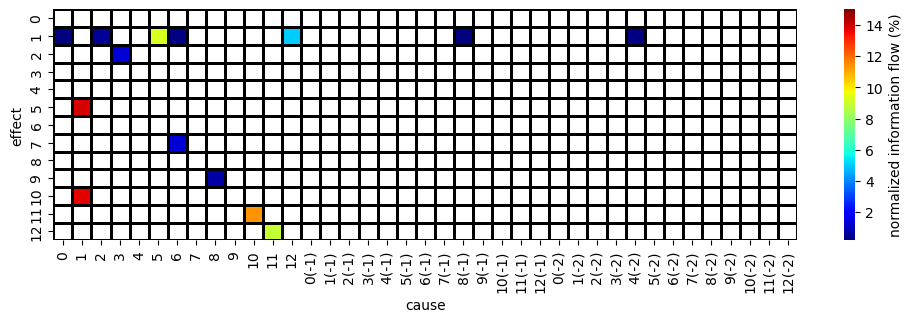

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

a=abs(IF_1['nIF'])
b=abs(IF_1['p'])
a[np.where(b<0.99)]=np.NaN
nM=a.shape[0]

a[np.where(a<0.001)]=np.NaN
#for i in range(nM):
#    a[i,i,:]=np.NaN

c=np.reshape(a[:,:,::1],[13,13*3]).T
for i in range(nM):
    c[i,i]=np.NaN

data=pd.DataFrame(c.transpose())

dict_={'orientation':'vertical',"label":"normalized information flow (%)",\
       "ticklocation":"right", "alpha":0.8,"cmap":"cmap"}

plt.figure(figsize=(12, 3))
xticklabels=['0'    ,'1'    ,'2'    ,'3'    ,'4'    ,'5'    ,'6'    ,'7'    ,'8'    ,'9'    ,'10'    ,'11'    ,'12'    , \
             '0(-1)','1(-1)','2(-1)','3(-1)','4(-1)','5(-1)','6(-1)','7(-1)','8(-1)','9(-1)','10(-1)','11(-1)','12(-1)', \
             '0(-2)','1(-2)','2(-2)','3(-2)','4(-2)','5(-2)','6(-2)','7(-2)','8(-2)','9(-2)','10(-2)','11(-2)','12(-2)', ]
plot=sns.heatmap(data*100,linewidths=0.8,linecolor='black',cmap="jet",vmax=15,vmin=0.2,cbar_kws=dict_,xticklabels=xticklabels)

plt.xlabel('cause');
plt.ylabel('effect');

### Here we give a clearer causal diagram as below:

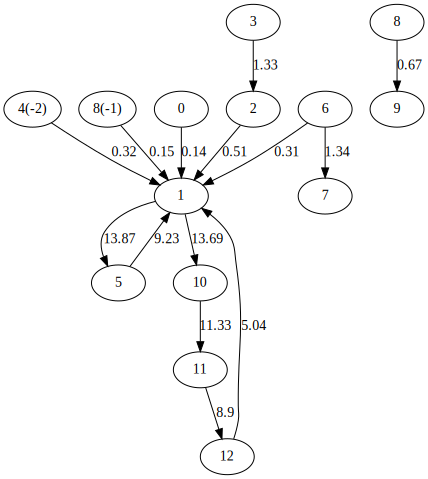

In [10]:
import graphviz as gz
#https://www2.graphviz.org/Packages/stable/windows/10/cmake/Release/x64/


def addEdge(a, b):
    global edgeLinks
    if a not in edgeLinks: edgeLinks[a] = set()
    if b not in edgeLinks: edgeLinks[b] = set()
    edgeLinks[a].add(b)
    edgeLinks[b].add(a)


edgeLinks = dict()
edge=[]
dot = gz.Digraph()
A=np.array(data);
tmp=A[:,0:13]+0;
A[:,0:13]=A[:,13*2:]+0;
A[:,13*2:]=tmp+0;
A=A.T; nodes=[];
for ix in range(39):
    for iy in range(13):
        if ix!=iy:
              if np.isnan(A[ix,iy]):
                  tmp=0
              else:
                    addEdge(str(ix), str(iy+13*2))
                    dot.edge(str(ix), str(iy+13*2),str(np.ceil(A[ix,iy]*10000)/100))
                    nodes.append([ix,iy+13*2])



for i in np.unique(nodes):
    dot.node(str(i), str(i-13)+'(-1)')
    if i<13:
        dot.node(str(i), str(i)+'(-2)')
    if i>25:
        dot.node(str(i), str(i-26))

#dot.edges(edge)
import os
os.system('dot -Tpng dot_data_new.txt -o causal_graph.png') 
dot

# case 6 (computational cost for large-scale IF analysis):

In [11]:
import time
from tqdm import tqdm
NN=[200,1000,5000,10000]
MM=[10,50,100]
nlag=0; #time delay
for iN in range(3):
    N=NN[iN];#time steps
    for iM in range(3):
        M=MM[iM];# varilabe number
        jj=0;
        tcost=[];IF=[];A_gt=[]
        print([iN,iM])
        for icase in tqdm(range(100)):
        
            b=(np.random.randint(4)+1)/20;

            max_x=10 #if x >10 then regard the model is unstable
            while max_x>=10:
                A=np.random.normal(size=(M,M));
                A[np.where(A<1)]=0;
                A[np.where(A>=1)]=0.2;
                A=A*(1-np.eye(M,M))+0.2*np.eye(M,M);
                tmp=np.ones((len(A[np.where(A==0.2)]),))
                tmp[::2]=-tmp[::2]
                A[np.where(A==0.2)]=A[np.where(A==0.2)]*tmp

                xx=np.zeros([N+1,M])
                xx[0,:]=np.random.normal(size=(M,))/2;
                for i in range(N):
                    xx[i+1]=np.dot(A,xx[i])+b*np.random.normal(size=(M,));
                #max_x=np.max(abs(xx));
                if np.isnan(np.max(abs(xx))):
                    print(jj)
                    max_x=10
                    jj=jj+1;
                else:
                    max_x=np.max(abs(xx))

            xx1=np.zeros([N-nlag,M+M*nlag])
            xx1[:,:M]=xx[:N-nlag,:];
            for i in range(nlag):
                xx1[:,(1+i)*M:(2+i)*M]=xx[i+1:N-nlag+i+1,:]
            
            ts=time.time()
            cau=causal.multi_causality_est_OLS(X=xx1.T);
            #T21=cau;
            te=time.time()
            tcost.append(te-ts)
            IF.append(cau)
            A_gt.append(A)
        np.savez('result_%04d_%04d.npz'%(M,N), **{'A':A_gt, 'IF':IF, 'tcost':tcost})

[0, 0]


100%|██████████| 100/100 [00:00<00:00, 406.87it/s]


[0, 1]


100%|██████████| 100/100 [00:01<00:00, 74.12it/s]


[0, 2]


100%|██████████| 100/100 [00:09<00:00, 10.88it/s]


[1, 0]


100%|██████████| 100/100 [00:00<00:00, 113.50it/s]


[1, 1]


100%|██████████| 100/100 [00:04<00:00, 21.82it/s]


[1, 2]


100%|██████████| 100/100 [00:26<00:00,  3.72it/s]


[2, 0]


100%|██████████| 100/100 [00:03<00:00, 25.94it/s]


[2, 1]


100%|██████████| 100/100 [00:10<00:00,  9.66it/s]


[2, 2]


100%|██████████| 100/100 [01:43<00:00,  1.03s/it]


In [12]:
NN=[200,1000,5000]
MM=[10,50,100]
nlag=0; #time delay
HD=[];Tcost=[];
for iN in range(3):
    N=NN[iN];#time steps
    for iM in range(3):
        M=MM[iM];# varilabe number
        data = np.load('result_%04d_%04d.npz'%(M,N),allow_pickle=True)
        A0=data['A']
        IF=data['IF']
        tcost=data['tcost']

        hd=[];
        for icase in range(100):
            a=IF[icase]['nIF'].squeeze();
            b=IF[icase]['p'].squeeze();
            A=A0[icase]+0;
            #A=A_gt[icase]+0;
            A[np.where(abs(A)>0.1)]=1
            A[np.where(abs(A)<0.1)]=0
            a[np.where(b<(1-1/(N-M)))]=np.NaN
            M=a.shape[0]

            a[np.where(abs(a)<(1/M**2)/100)]=np.NaN
            a[~np.isnan(a)]=1
            a[np.isnan(a)]=0
            hd.append(np.sum(abs(a-A)))
        HD.append(np.array(hd)/M**2)
        Tcost.append(tcost)

<Figure size 640x480 with 0 Axes>

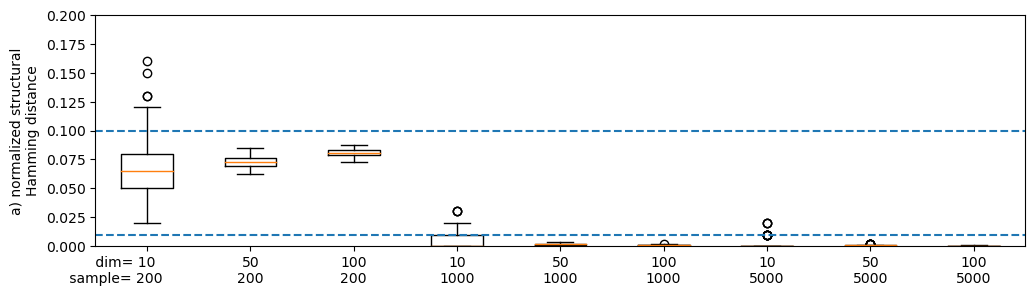

<Figure size 640x480 with 0 Axes>

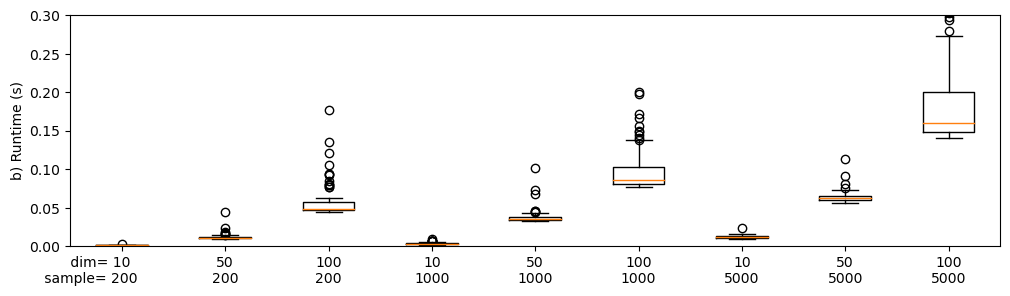

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure()
xticklabels=[' dim= 10           \n sample= 200               ',\
             '50\n200','100\n200','10\n1000','50\n1000','100\n1000','10\n5000','50\n5000','100\n5000']
plt.figure(figsize=(12, 3))
bp = plt.boxplot(np.array(HD).T,labels=xticklabels)
axes = plt.gca()
left, right = axes.get_xlim()
axes.hlines(y=[0.01,0.1], xmin=left, xmax=right, linestyles='dashed')
plt.ylim(0,0.2)
plt.ylabel('a) normalized structural\nHamming distance')
plt.show()


fig = plt.figure()
xticklabels=[' dim= 10           \n sample= 200               ',\
             '50\n200','100\n200','10\n1000','50\n1000','100\n1000','10\n5000','50\n5000','100\n5000']
plt.figure(figsize=(12, 3))
bp = plt.boxplot(np.array(Tcost).T,labels=xticklabels)
# axes = plt.gca()
# left, right = axes.get_xlim()
# axes.hlines(y=[0.01,0.1], xmin=left, xmax=right, linestyles='dashed')
plt.ylim(0,0.3)
plt.ylabel('b) Runtime (s)')
plt.show()

# case 7 (data with cross-correlated noise):

In [14]:
# -*- coding: utf-8 -*-
"""
Created on Sun Dec 31 15:03:43 2023
To generate the cross-correlated noise, we use the functions (var_to_tsdata, var_specrad, var_decay, genvar) which are all rewritten based on the Matlab script of MVGC matlab toolbox by Barnett and Seth:
Barnett, L., and A. K. Seth, 2014: The MVGC multivariate Granger causality toolbox: A new approach to Granger-causal inference. J. Neurosci. Methods, 223, 50–68, https://doi.org/10.1016/j.jneumeth.2013.10.018
@author: Yinen
"""

import numpy as np  
from scipy.linalg import eig  
from scipy.linalg import cholesky  
import scipy.io as scio
from tqdm import tqdm
def var_to_tsdata(A, SIG, m, N=1, mtrunc=None, decayfac=100):  
    if len(A.shape) == 1:  
        n = A.shape[0]  
        A = np.array([A])  
    else:  
        n = A.shape[1]  
  
    if mtrunc is None:  
        if decayfac is None:  
            decayfac = 100  
        rho = var_specrad(A)  
        assert rho < 1, 'unstable VAR'
        mtrunc = int((np.log(np.finfo(float).eps) - decayfac) / np.log(rho))  # enough time for autocovariance to decay to fp accuracy (and then some)  
    else:  
        assert np.isscalar(mtrunc) and np.isinteger(mtrunc) and mtrunc >= 0, 'mtrunc parameter must be a non-negative integer'
    try:
        C = cholesky(SIG, lower=True)  
    except:
        print( 'covariance matrix not positive-definite')  
  
    if N > 1:  # multi-trial  
        X = np.zeros((n, m, N))  
        E = np.zeros((n, m, N))  
        for r in range(N):  
            X[:, :, r], E[:, :, r] = genvar(A, C @ np.random.randn(n, m + mtrunc), mtrunc)  
        
    else:  # single trial  
        X, E = genvar(A, C @ np.random.randn(n, m + mtrunc), mtrunc)  
    return X, E, mtrunc

  
def var_specrad(A, newrho=None):  
    A_shape = A.shape  
    if len(A_shape)==2:
        A=A.reshape([A_shape[0],A_shape[1],1])
    n, n1, p = A.shape  
    assert n1 == n, 'VAR coefficients matrix has bad shape'  
    pn1 = (p-1)*n  
    if pn1!=0:
    # construct VAR coefficients for 1-lag problem  
        A1 = np.concatenate((A.reshape(n, p*n), np.eye(pn1), np.zeros((pn1, n))), axis=1)  
    else:
        A1 = A.reshape(n, p*n)
  
    # calculate spectral radius  
    eig_A,_ = eig(A1)
    rho = max(np.abs(eig_A))  
  
    if newrho is None or len(newrho) == 0:  
        #assert len(rho) <= 1, 'too many output parameters'  
        return rho  
    else:  
        return var_decay(A, newrho/rho), rho  # adjusted coefficients, previous value of spectral radius

def var_decay(A, dfac):  
    p = A.shape[2]  # Assuming A is a 3D numpy array  
    f = dfac  
    for k in range(p):  
        A[:, :, k] *= f  # Multiply each slice of A by f  
        f *= dfac  # Update f  
    return A  # Return modified A

def genvar(A, E, trunc=0):  
    assert np.isrealobj(A) and (A.ndim == 2 or A.ndim == 3), 'VAR coefficients must be a 2D or 3D matrix'  
    assert np.isrealobj(E) and E.ndim == 2, 'Residuals covariance must be a row vector or 2D matrix'  
    if A.ndim == 2:
        n1, n2 = A.shape
        A=A.reshape([n1,n2,1])
    n1, n2, p = A.shape  
    n, m = E.shape  
      
    assert n1 == n2, 'VAR coefficients blocks not square'  
    assert n1 == n,  'Residuals covariance matrix doesn''t match VAR coefficients matrix'  
    assert trunc >= 0 & trunc < m,'bad truncation'
      
    X = E.copy()  # Initialize X as a copy of E  
      
    for t in range(p+1, m):  
        for k in range(1, p+1):  
            X[:, t] = X[:, t] + np.dot(A[:, :, k-1], X[:, t-k])  # Update X using the VAR coefficients  
    if trunc >= 0 and trunc < m:  
        X = X[:, trunc+1:]  # Truncate X  
        if len(E.shape) == 2:  
            E = E[:, trunc+1:]  # Truncate E if it's a matrix  
            
    return X, E  # Return X and E (if there are more than one output argument)



if __name__=='__main__':
    NT = 100000  
    # Case 1  
    AT1 = [[0.5, -0.5], [-0.0, 0.6]]  
    
    # Case 2  
    AT2 = [[-0.5, 0.5], [-0.2, 0.5]]  
    
    # Case 3  
    AT3 = [[0.5, -0.2], [-0.5, 0.25]]  
    
    # Case 4  
    AT4 = [[0.25, -0.1], [-0.2, 0.1]]

    AT=np.array(AT1)



    j = 1  
    CE_3d=[];CX_3d=[];NIF_3d=[];IFs_3d=[];p_3d=[];SEIF_3d=[]
    for i in tqdm(np.arange(-0.5, 0.5, 0.01)):  
        #print('%.2f'%i)  
        SIFT = np.array([[0.5, i], [i, 0.5]])    
        X, E, _ = var_to_tsdata(AT, SIFT, NT)
      
        CE_3d.append(np.corrcoef(E))
        CX_3d.append(np.corrcoef(X))
      
        cau = causal.multi_causality_est_OLS(X)  
        NIF_3d.append(cau['nIF'])
        p_3d.append(cau['p'])
        SEIF_3d.append(cau['SEIF'])
        IFs_3d.append(cau['IF'])
      
        j += 1

    #scio.savemat('data_1.mat',{'CX': CX_3d, 'CE': CE_3d,'NIF': NIF_3d})

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:33<00:00,  3.03it/s]


normalized IF:
effect size of IF:
relative importance of [normalized IF (X2->X1)]/[normalized IF (X1->X2)]:


(-0.2, 1.5)

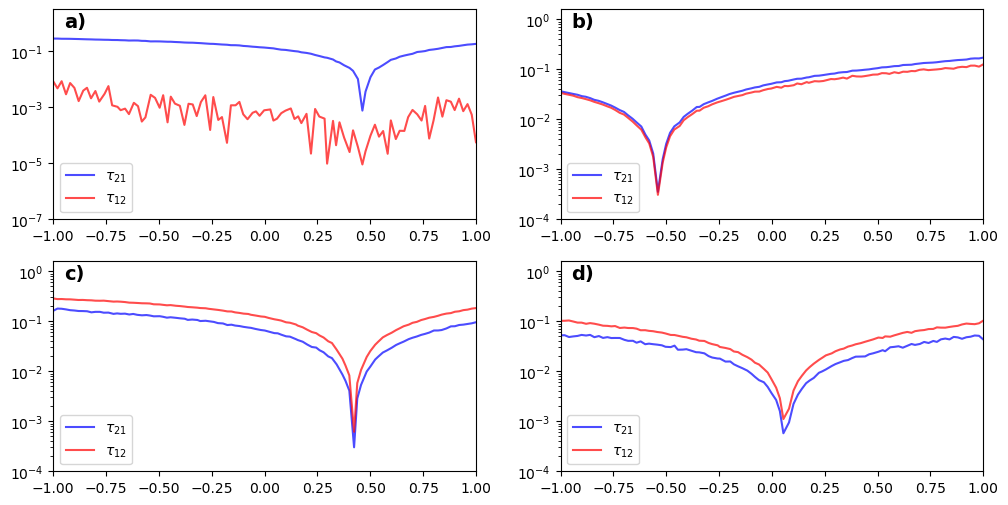

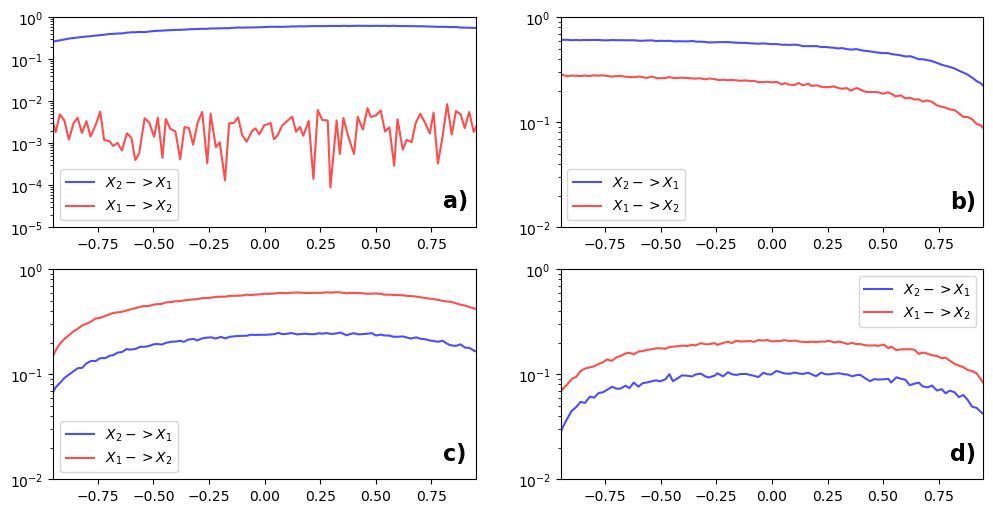

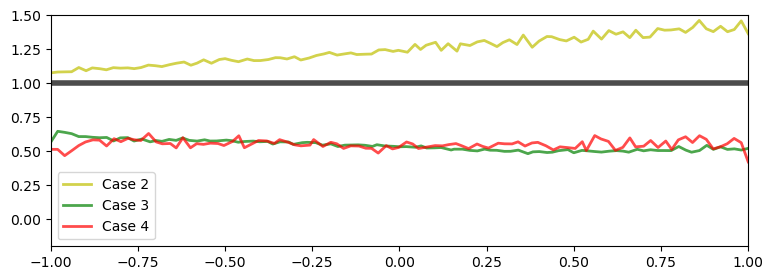

In [15]:
## plot 
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(12,6), dpi=100)

text_xy=[-0.95, 0.7]
texts=['a)','b)','c)','d)']
ylim=[[10**(-7),10**0.5],[10**(-4),10**0.2],[10**(-4),10**0.2],[10**(-4),10**0.2]]

# normalized IF
print('normalized IF:')
for i in range(4):
    data1=scio.loadmat('data'+str(i+1)+'.mat')
    C=data1['CE']
    x=C[0,1]
    NIF=data1['NIF']
    y1=abs(NIF[0,1])
    y2=abs(NIF[1,0])
    plt.subplot(221+i)
    #plot
    plt.semilogy(x, y1, lw=1.5, c='b', alpha=0.7)
    plt.semilogy(x, y2, lw=1.5, c='r', alpha=0.7)
    plt.legend([r'$\tau_{21}$',r'$\tau_{12}$'],loc='lower left')
    plt.xlim([-1,1])
    plt.ylim(ylim[i])
    plt.text(text_xy[0],text_xy[1],texts[i],fontdict=dict(fontsize=14, color='k',weight='bold'))


# effect size
print('effect size of IF:')
fig=plt.figure(figsize=(12,6), dpi=100)

text_y=[0.00003,0.015,0.015,0.015]
ylim=[[1e-5,1],[1e-2,1],[1e-2,1],[1e-2,1]]
for i in range(4):
    data1=scio.loadmat('data'+str(i+1)+'.mat')
    C=data1['CE']
    x=C[0,1]
    dIF=abs(data1['IF']/data1['SEIF']/np.sqrt(NT))  #effect size
    y1=abs(dIF[0,1])
    y2=abs(dIF[1,0])
    
    plt.subplot(221+i)
    plt.semilogy(x, y1, lw=1.5, c='b', alpha=0.7)
    plt.semilogy(x, y2, lw=1.5, c='r', alpha=0.7)
    plt.text(0.8,text_y[i],texts[i],         fontdict=dict(fontsize=16, color='k',
                           #family='monospace',#'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'
                           weight='bold',#'light', 'normal', 'medium', 'semibold', 'bold', 'heavy', 'black'
                          
                          )
    )
    plt.legend([r'$X_2->X_1$',r'$X_1->X_2$'])
    plt.ylim(ylim[i])
    plt.xlim([-0.95,0.95])



# relative importance of IF(X2->X1)/IF(X1->X2)
print('relative importance of [normalized IF (X2->X1)]/[normalized IF (X1->X2)]:')
fig=plt.figure(figsize=(9,3), dpi=100)
color=['b','y','g','r']
for i in range(1,4):
    data1=scio.loadmat('data'+str(i+1)+'.mat')
    C=data1['CE']
    x=C[0,1]
    NIF=data1['NIF']
    y1=abs(NIF[0,1])
    y2=abs(NIF[1,0])
    #plt.subplot(221+i)
    plt.plot(x, y1/y2, lw=2, c=color[i], alpha=0.7)


plt.legend([r'Case 2',r'Case 3',r'Case 4'])
plt.plot([-1,1], [1 ,1], lw=4, c='k', alpha=0.7)
plt.xlim([-1,1])
plt.ylim([-0.2,1.5])


# case 8 (time varying causality):

In [16]:
# time varying causality
from tqdm import tqdm
a11=0.3;a12=-0.4;a22=0.7;a21=0;b1=0.4;b2=0.5;
x=np.zeros([100000,])
y=np.zeros([100000,])
x[0]=0.4;y[0]=0.3;
for i in range(50000-1):
    x[i+1]=a11*x[i]+a21*y[i]+b1*np.random.uniform(-1,1);
    y[i+1]=a12*x[i]+a22*y[i]+b2*np.random.uniform(-1,1);

print ("x(i+1)=%.2f * x(i) + %.2f * y(i) + %.2f W" % (a11, a21,b1))
print ("y(i+1)=%.2f * x(i) + %.2f * y(i) + %.2f W" % (a12, a22,b2))

a11=0.3;a12=0.0;a22=0.7;a21=0.3;b1=0.4;b2=0.5;
for i in range(50000-1,100000-1):
    x[i+1]=a11*x[i]+a21*y[i]+b1*np.random.uniform(-1,1);
    y[i+1]=a12*x[i]+a22*y[i]+b2*np.random.uniform(-1,1);

print ("x(i+1)=%.2f * x(i) + %.2f * y(i) + %.2f W" % (a11, a21,b1))
print ("y(i+1)=%.2f * x(i) + %.2f * y(i) + %.2f W" % (a12, a22,b2))


print('caculating:')
window_size=1000;
T=np.zeros([100000,]);E99=np.zeros([100000,]);T1=np.zeros([100000,]);E991=np.zeros([100000,])
for i in tqdm(range(10000,90000)):
    tmp=np.zeros([2,window_size*2]);
    tmp[0]=x[i-window_size:i+window_size];
    tmp[1]=y[i-window_size:i+window_size];
    cau=causal.multi_causality_est_OLS(tmp);
    T21=cau['IF'].squeeze();
    e99=cau['err_e99'].squeeze();
    T[i]=T21[0,1];E99[i]=e99[0,1];
    T1[i]=T21[1,0];E991[i]=e99[1,0];


#T=data['T'];T1=data['T1'];E99=data['E99'];E991=data['E991'];





x(i+1)=0.30 * x(i) + 0.00 * y(i) + 0.40 W
y(i+1)=-0.40 * x(i) + 0.70 * y(i) + 0.50 W
x(i+1)=0.30 * x(i) + 0.30 * y(i) + 0.40 W
y(i+1)=0.00 * x(i) + 0.70 * y(i) + 0.50 W
caculating:


100%|██████████| 80000/80000 [01:06<00:00, 1210.93it/s]


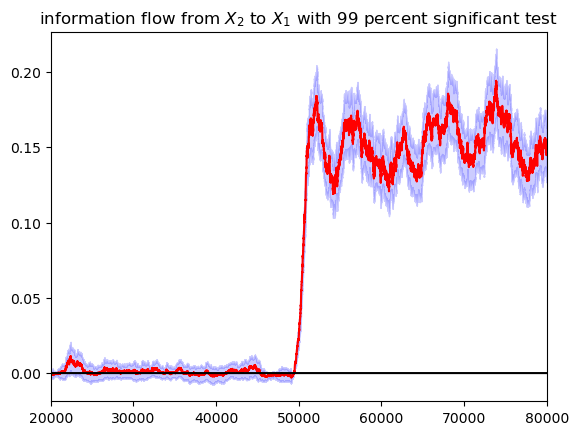

In [17]:
from matplotlib import pyplot as plt
# import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.arange(20000,80001),  T[20000:80001],color='r')
plt.plot(np.arange(20000,80001),  np.zeros([60001,]),color='k')
plt.fill_between(np.arange(20000,80001),
                 T[20000:80001]-E99[20000:80001],
                 T[20000:80001]+E99[20000:80001],
                 color='b',
                 alpha=0.2)
plt.xlim([20000,80000])
plt.title('information flow from $X_2$ to $X_1$ with 99 percent significant test')
plt.show()